81.75191126384519
56.27690411488715
0.9069472685622859
0.22187474150644093


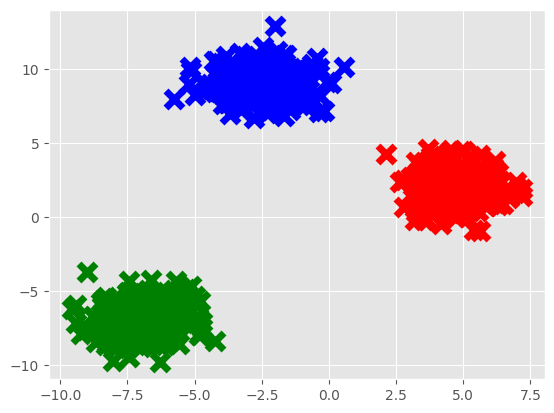

In [27]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=1500):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        self.centroids = {}
        #test=[data.sample(n=self.k)]
        #print(test)
        for i in range(self.k):
            centroid = data[random.randint(0, len(data))]
            self.centroids[i] = centroid
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

X,Y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
model = K_Means()
model.fit(X_train)
#print(X)
#print(Y)
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=15, linewidths=5)
colors=["blue","red","green"]
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)